In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import sys
sys.path.append('../../../01_Shared_Lib')
import constants as c



In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 등 설치된 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [3]:
#파일 경로
filepath = Path("../../../00_Common_Data/Master_Sales_2025_Total.parquet")

#파일 불러오기
df = pd.read_parquet(filepath)
df

,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt,month,period
0,2025-01-01,41500,41500250,D01,소매/유통,가전제품,5,F,8,수요일,1923474,2,1,겨울
1,2025-01-01,41500,41500250,D01,소매/유통,가전제품,7,F,5,수요일,43152,2,1,겨울
2,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,4,M,3,수요일,8400,2,1,겨울
3,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,5,F,3,수요일,68164,2,1,겨울
4,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,5,M,4,수요일,141139,2,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097779,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,5,M,7,금요일,29746,2,10,가을
5097780,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,6,F,6,금요일,227280,3,10,가을
5097781,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,6,F,7,금요일,223489,3,10,가을
5097782,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,6,M,7,금요일,109421,2,10,가을


In [4]:
#음식 데이터 
food_df = df[df['card_tpbuz_nm_1'] == '음식']

#음식 데이터 중 간이주점 선택
pubs_df = food_df[food_df['card_tpbuz_nm_2'] == '간이주점']
pubs_df

,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt,month,period
355,2025-01-01,41500,41500250,Q01,음식,간이주점,1,F,3,수요일,78552,2,1,겨울
356,2025-01-01,41500,41500250,Q01,음식,간이주점,1,M,3,수요일,234802,3,1,겨울
357,2025-01-01,41500,41500250,Q01,음식,간이주점,4,F,4,수요일,44399,2,1,겨울
358,2025-01-01,41500,41500250,Q01,음식,간이주점,4,M,7,수요일,39276,2,1,겨울
359,2025-01-01,41500,41500250,Q01,음식,간이주점,5,F,6,수요일,81318,2,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097041,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,4,금요일,80260,2,10,가을
5097042,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,6,금요일,74162,2,10,가을
5097043,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,7,금요일,35861,2,10,가을
5097044,2025-10-31,41500,41500530,Q01,음식,간이주점,10,M,5,금요일,353313,3,10,가을


In [5]:
## 시간, 요일, 요일 정렬
pubs_df['hour'] = pubs_df['hour'].map(c.TIME_SHORT_MAP)
pubs_df['age'] = pubs_df['age'].map(c.AGE_MAP)

## day 정렬기준 ( 카테고리 타입임 )
day_order = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

pubs_df['day'] = pd.Categorical(pubs_df['day'], categories=day_order, ordered=True)

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1794761631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['hour'] = pubs_df['hour'].map(c.TIME_SHORT_MAP)
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1794761631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['age'] = pubs_df['age'].map(c.AGE_MAP)
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1794761631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1087000667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pubs_amt = pubs_df.groupby(['day', 'sex'])['amt'].sum().sort_index().reset_index()
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1087000667.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pubs_cnt = pubs_df.groupby(['day', 'sex'])['cnt'].sum().sort_index().reset_index()


Text(0, 0.5, '단위 : 만')

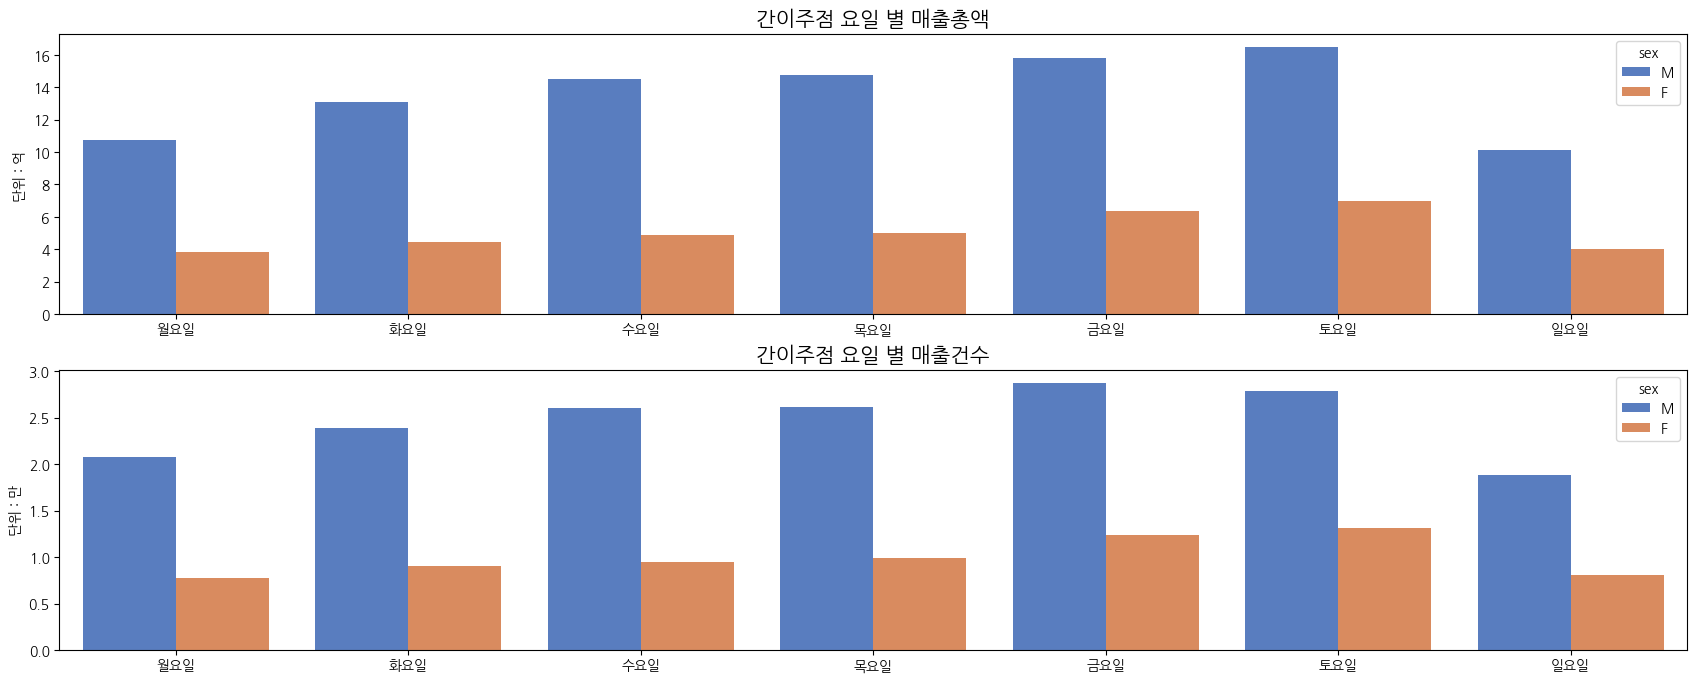

In [6]:
# 도화지 설정
fig, axes = plt.subplots(2, 1, figsize=(21,8))

## 그래프에 사용할 변수 설정
pubs_amt = pubs_df.groupby(['day', 'sex'])['amt'].sum().sort_index().reset_index()

## 매출총액 단위 (단위 : 억)
y_day_amt = pubs_amt['amt']/100000000

# 매출총액 그래프
amt_bar = sns.barplot(data = pubs_amt, x = pubs_amt['day'], y =y_day_amt, hue=pubs_amt['sex'], hue_order=['M','F'], palette='muted', ax=axes[0])
amt_bar.set_title(label="간이주점 요일 별 매출총액", fontsize = 15)
amt_bar.set_xlabel('')
amt_bar.set_ylabel(ylabel= '단위 : 억 ')

# ---
## 그래프에 사용할 변수 설정
pubs_cnt = pubs_df.groupby(['day', 'sex'])['cnt'].sum().sort_index().reset_index()

## 매출건수 단위 ( 단위 : 만)
y_day_cnt = pubs_cnt['cnt']/10000

#매출건수
cnt_bar = sns.barplot(data=pubs_cnt, x = pubs_cnt['day'], y = y_day_cnt, hue=pubs_cnt['sex'], hue_order=['M','F'], palette='muted', ax=axes[1])
cnt_bar.set_title(label="간이주점 요일 별 매출건수", fontsize = 15)
cnt_bar.set_xlabel('')
cnt_bar.set_ylabel(ylabel='단위 : 만')

↑ 원래 일주일이나 한달 간격이면 화, 수, 목이 비슷비슷한데 1~10월 다 모으고 보니 화 < 수 < 목 순으로 높아짐.
그리고 여전히 꼴등은 일요일(주말에 가까울 수 록 소비성향이 커진다)

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\3555613915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['ta_ymd'] = pd.to_datetime(pubs_df['ta_ymd'], format='%Y%m%d')
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\3555613915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['month'] = pubs_df['ta_ymd'].dt.month
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\3555613915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Text(0, 0.5, '단위 : 만')

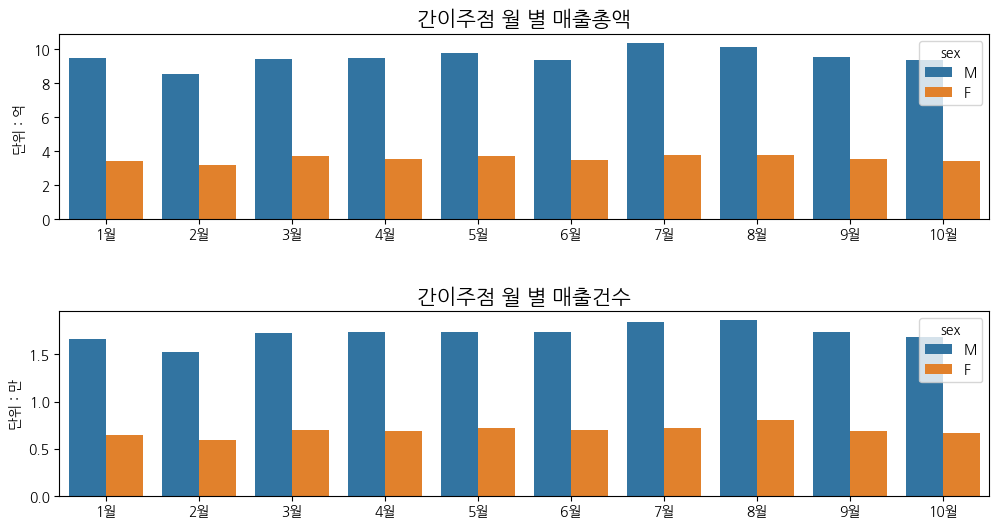

In [7]:
# 달(월) 중 가장 높은 달은 ? [amt, cnt]

# 데이터 전처리
pubs_df['ta_ymd'] = pd.to_datetime(pubs_df['ta_ymd'], format='%Y%m%d')
pubs_df['month'] = pubs_df['ta_ymd'].dt.month
pubs_df['month'] = pubs_df['month'].astype(str)
pubs_df['month'] = pubs_df['month'] + "월"
pubs_df['month'] = pubs_df['month'].astype('category')

## 월 정렬
my_month = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']

## 도화지 생성 & 그래프 거리 조절
fig, axes = plt.subplots(2, 1, figsize=(12,6))
fig.subplots_adjust(hspace=0.5)

## 시각화 할 데이터 생성
month_amt_pubs = pubs_df.groupby(['month', 'sex'])['amt'].sum().reset_index()

## 매출총액 단위 ( 단위 : 억 )
y_month_amt = month_amt_pubs['amt']/100000000

## Month_amt_bar
amt_bar = sns.barplot(data = month_amt_pubs, x = month_amt_pubs['month'], y = y_month_amt, hue = month_amt_pubs['sex'],
                       hue_order=['M', 'F'], order = my_month, ax=axes[0])
amt_bar.set_title(label="간이주점 월 별 매출총액", fontsize = 15)
amt_bar.set_xlabel('')
amt_bar.set_ylabel(ylabel= '단위 : 억 ')

# ---
## 시각화 할 데이터 생성
month_cnt_pubs = pubs_df.groupby(['month', 'sex'])['cnt'].sum().reset_index()

## 매출 건 수 단위 ( 단위 : 만 )
y_month_cnt = month_cnt_pubs['cnt']/10000

## Month_cnt_bar
cnt_bar = sns.barplot(data = month_cnt_pubs, x = month_cnt_pubs['month'], y = y_month_cnt, hue= month_cnt_pubs['sex'],
                      order=my_month, hue_order=['M','F'], ax=axes[1])
cnt_bar.set_title(label="간이주점 월 별 매출건수", fontsize = 15)
cnt_bar.set_xlabel('')
cnt_bar.set_ylabel(ylabel='단위 : 만')

 다른건 다 비슷비슷한데, 8월 여성이 매출건수가 높으나 매출총액은 비슷함 (건수만 높고 금액이 낮음 = 단가가 낮다, 싼 걸 많이 소비했다 ?)
 -> 나중에 매출건수 매출총액 뭐시기기준해서 색상표시 ? (상부에서 시켰다는 느낌으로)

 2월이 작고, 7월이 크네 ? 
 특히 여름(7월, 8월)이 매출총액이 크며 다른 월과 매출건수는 비슷하네(8월 제외)

 또, 남자의 매출(총액, 건수)이 압도적으로 여자보다 높네 ? 

---
요일, 월별 amt cnt를 봤음.

시간대 별 amt,cnt,성별,나이

산점도, 히트맵, tree맵


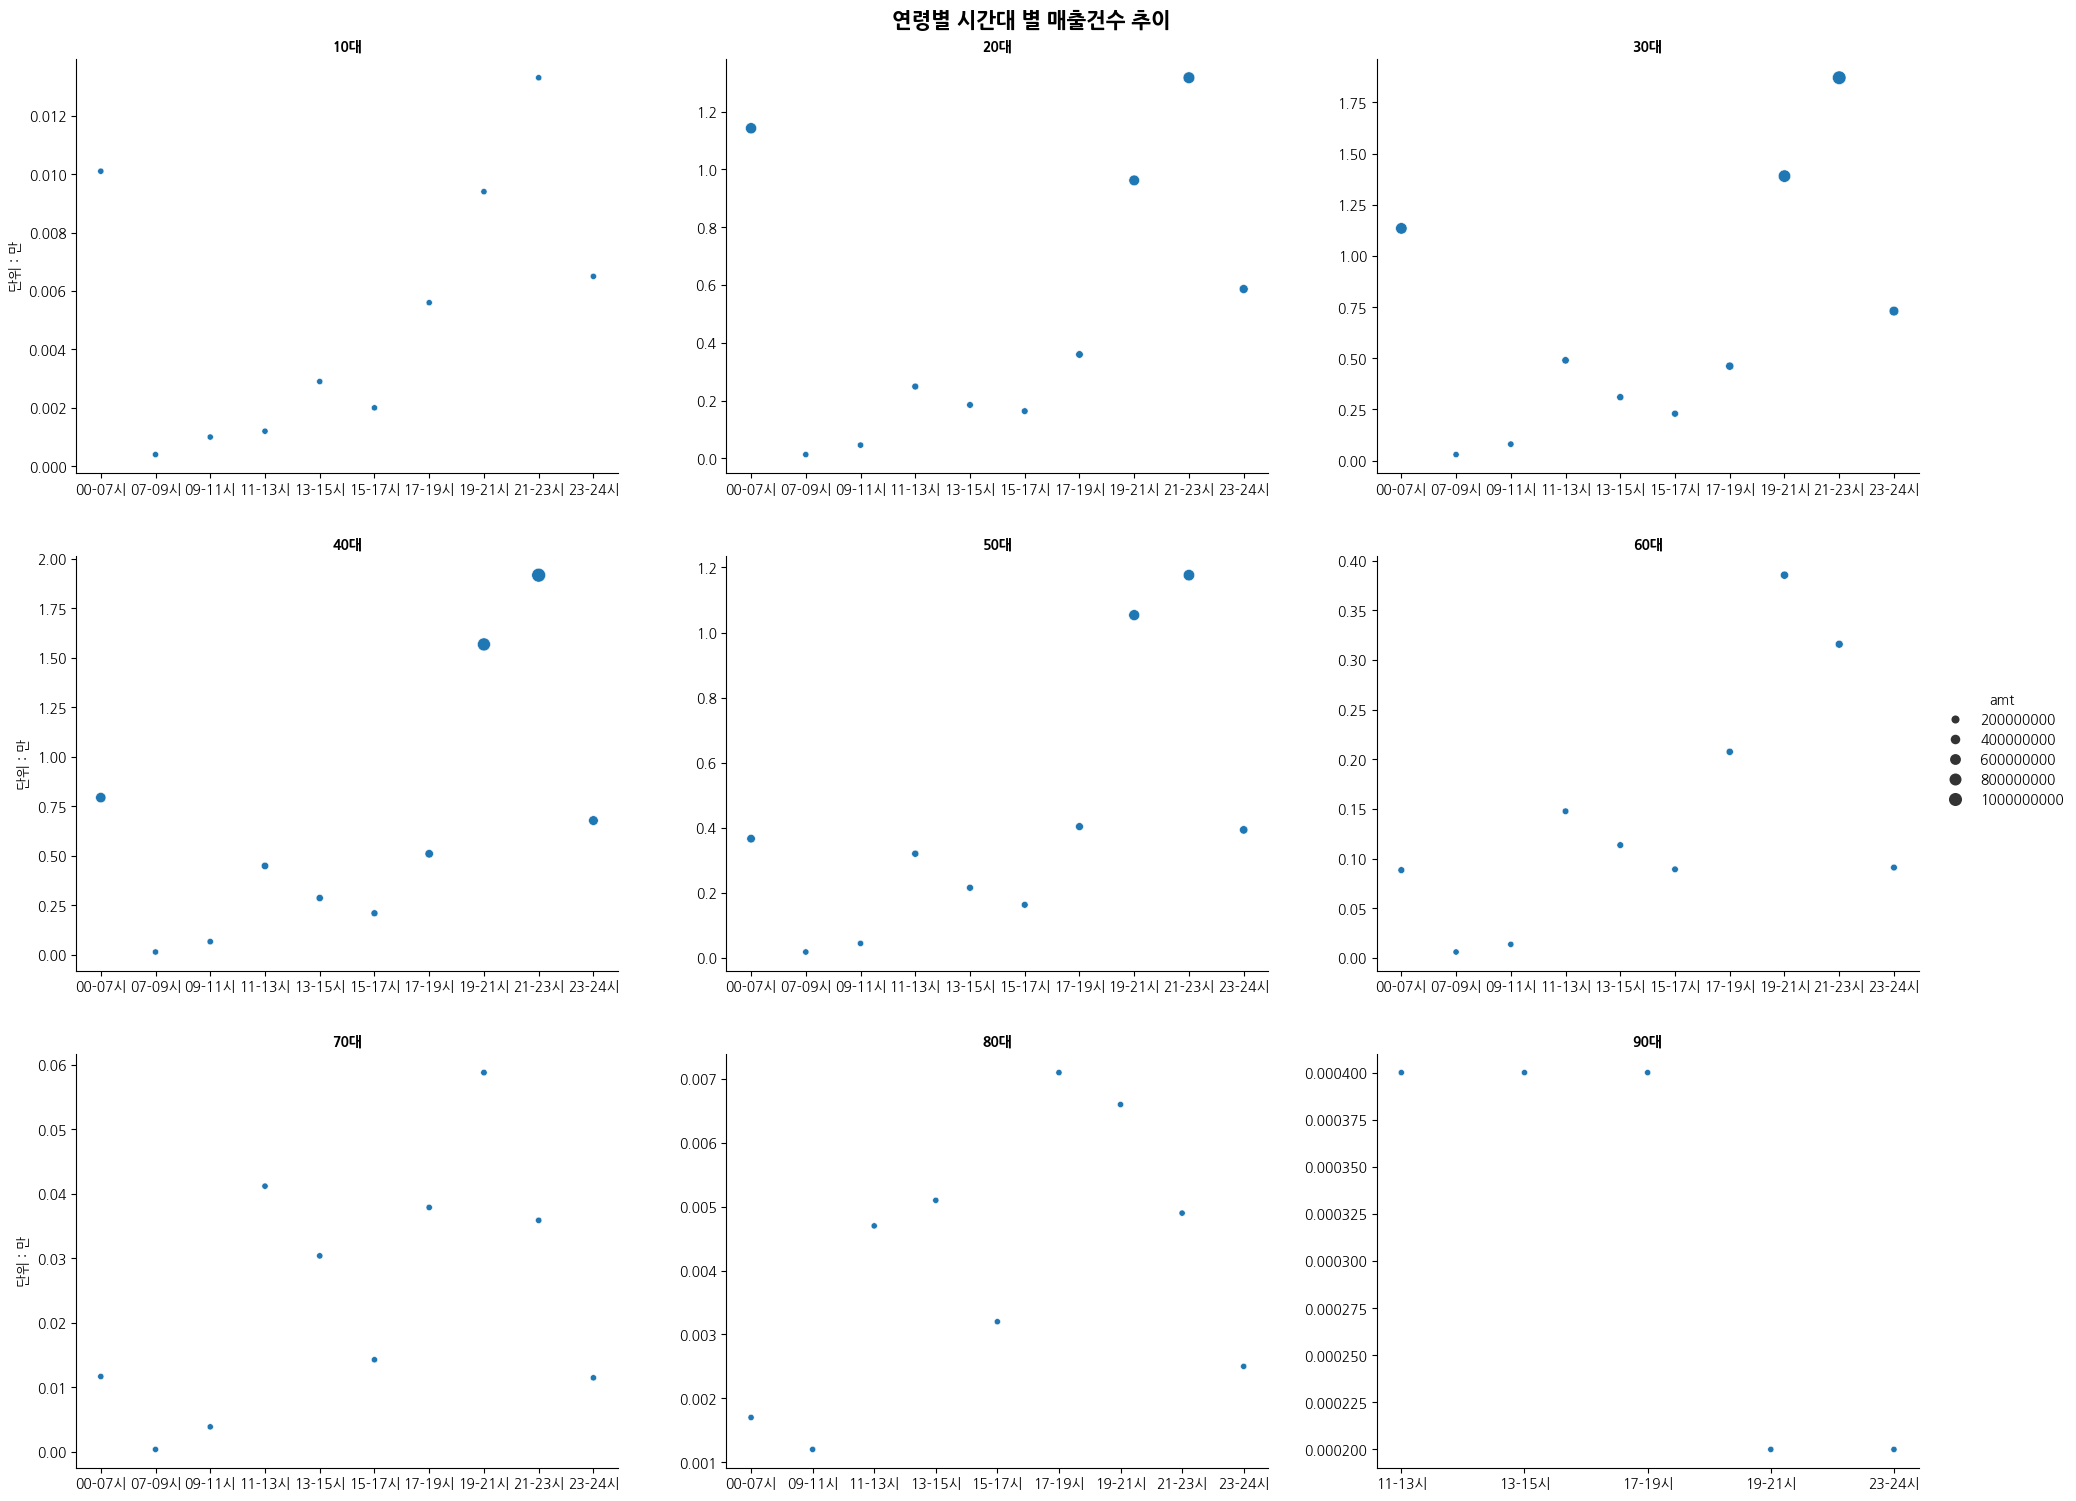

In [8]:
# 시간대 10개에 나이 9개 -> 90종류 ->  multiple

## 산점도 데이터 생성
multiple_hour_age_pubs = pubs_df.groupby(['age','hour'])[['amt','cnt']].sum().reset_index()

## cnt 단위 (만)
cnt_y = multiple_hour_age_pubs['cnt']/10000

## 멀티플 산점도 ( 범례, 색깔, 모양 고려해볼 것)
### x와 y 각각 표시, 거리조절
m = sns.relplot(data = multiple_hour_age_pubs, x = multiple_hour_age_pubs['hour'], y = cnt_y, col='age', kind = 'scatter', col_wrap = 3,
                size='amt', sizes=(20,100), row_order = 3, aspect=1.3,
                  facet_kws={'sharex':False, 'sharey':False})
m.fig.subplots_adjust(hspace=0.2, wspace=0.2)
m.fig.suptitle('연령별 시간대 별 매출건수 추이', fontsize = 15, weight='bold', y=1.01)

# ax번째에 이름부여
for age, axes in m.axes_dict.items():
  axes.set_title(f"{age}", fontsize = 10, weight='bold')
  axes.set_xlabel('')
  if age in ['10대', '40대', '70대']:
     axes.set_ylabel('단위 : 만')
  else:
     pass

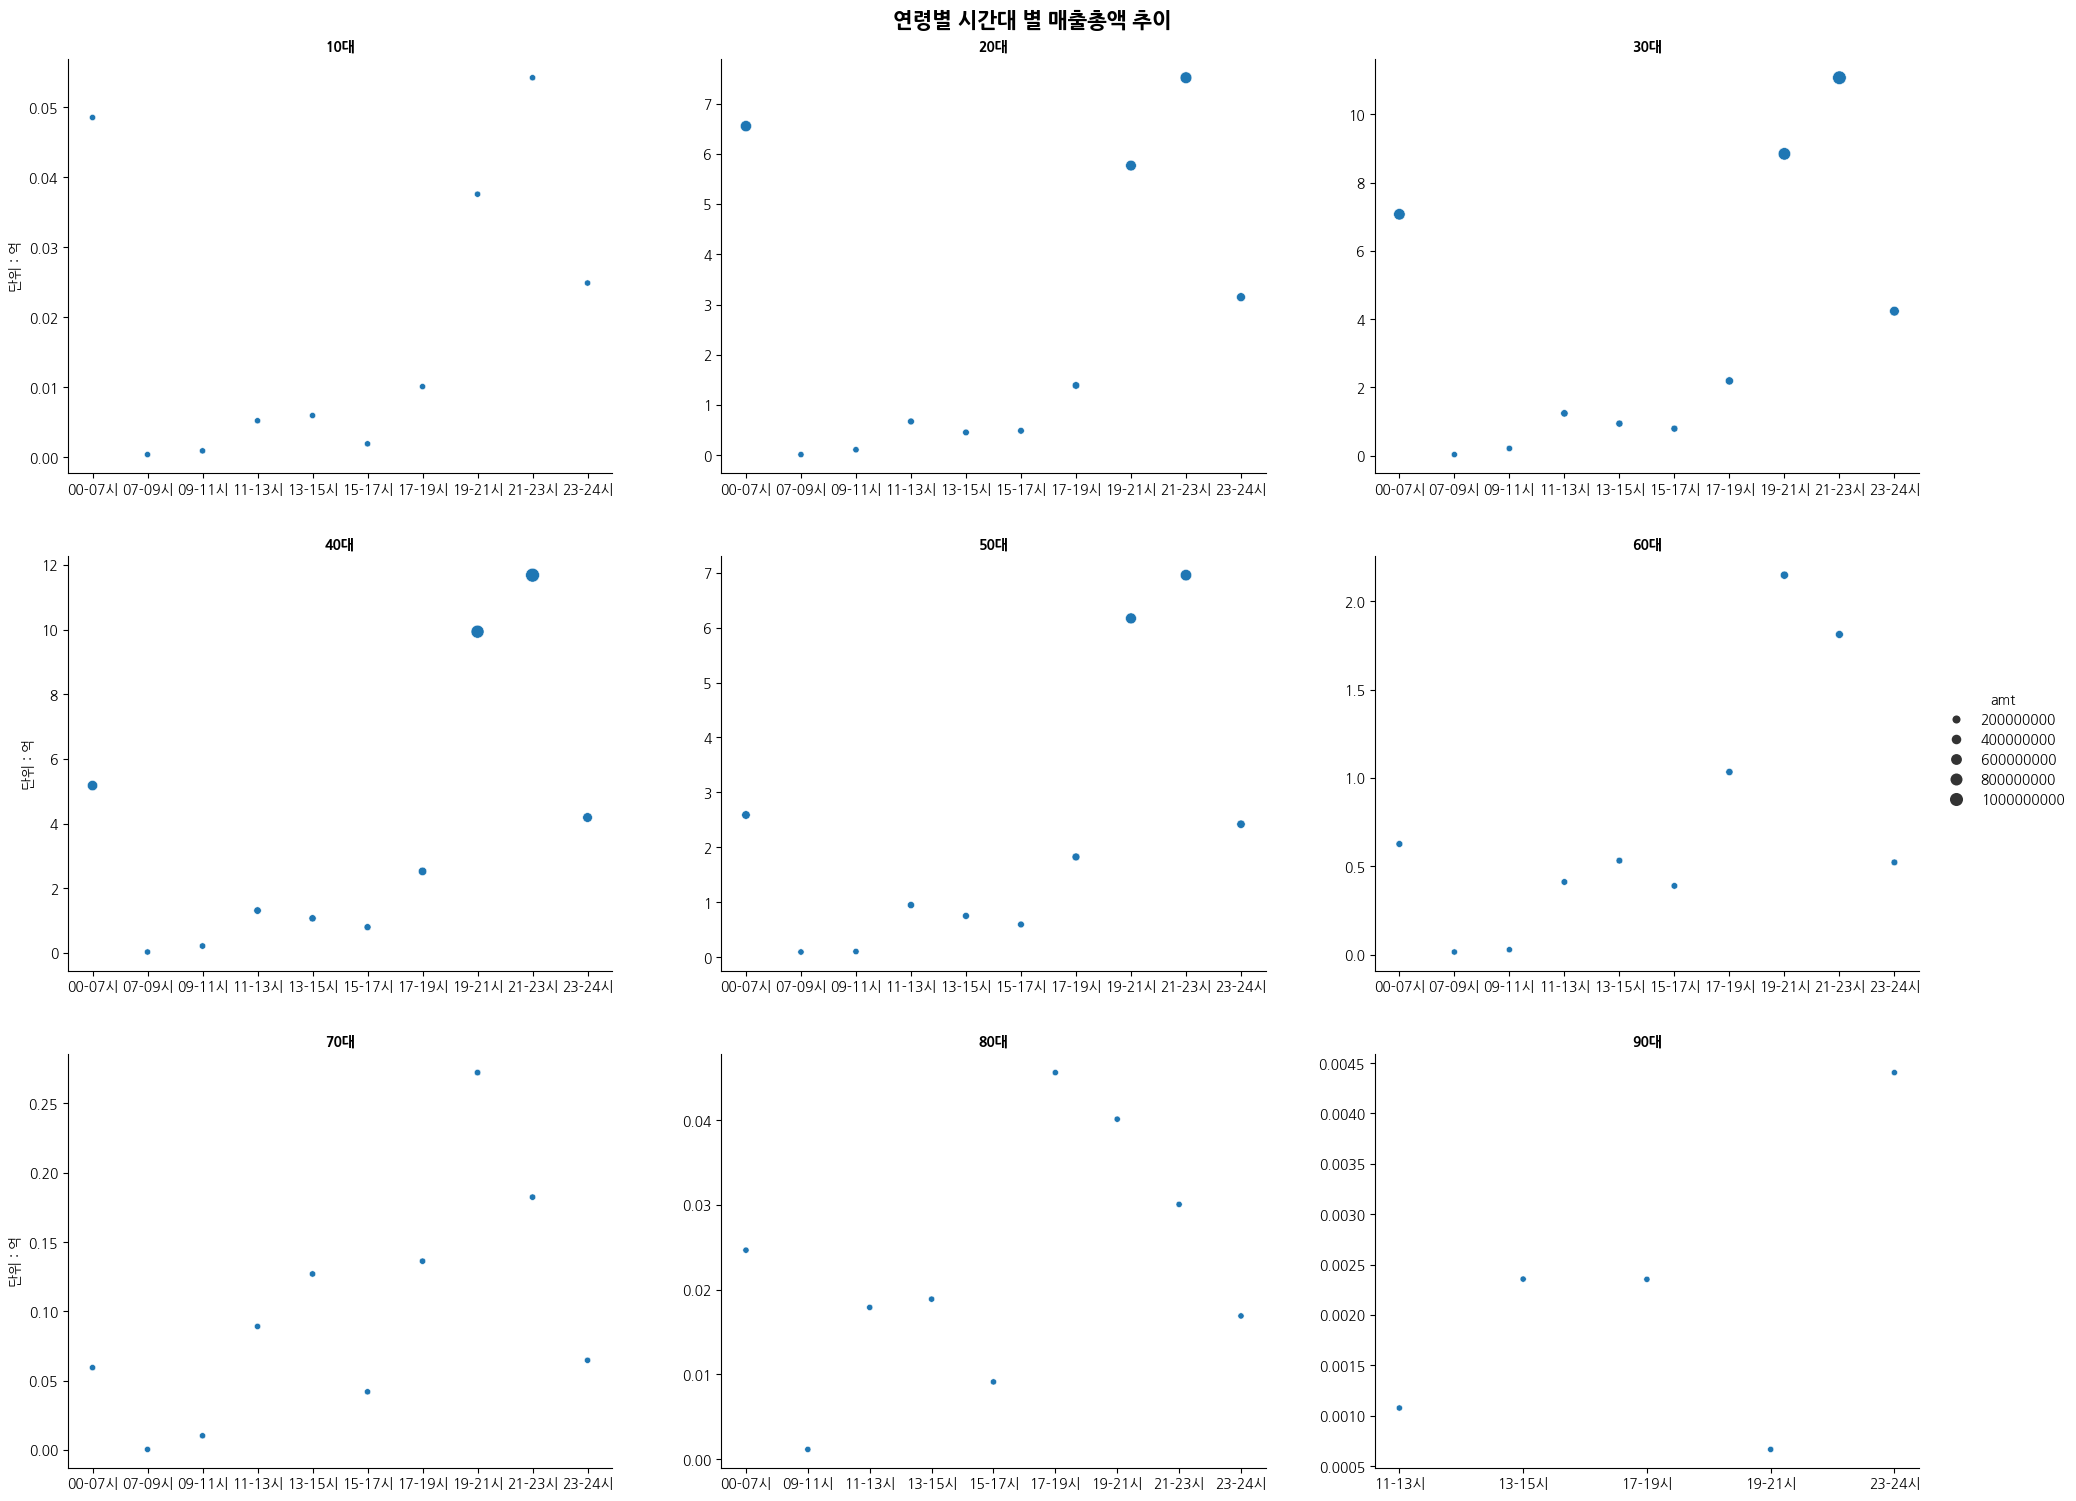

In [9]:
#multiple amt ver

## amt 단위 (억)
amt_y = multiple_hour_age_pubs['amt']/100000000

## 멀티플 산점도 ( 범례, 색깔, 모양 고려해볼 것)
### x와 y 각각 표시, 거리조절
m = sns.relplot(data = multiple_hour_age_pubs, x = multiple_hour_age_pubs['hour'], y = amt_y, col='age', kind = 'scatter', col_wrap = 3,
                size='amt', sizes=(20,100), row_order = 3, aspect=1.3,
                  facet_kws={'sharex':False, 'sharey':False})
m.fig.subplots_adjust(hspace=0.2, wspace=0.2)
m.fig.suptitle('연령별 시간대 별 매출총액 추이', fontsize=15, weight='bold', y=1.01)

# ax번째에 이름부여
for age, ax in m.axes_dict.items():
  ax.set_title(f"{age}", fontsize = 10, weight='bold')
  ax.set_xlabel('')
  if age in ['10대', '40대', '70대']:
     ax.set_ylabel('단위 : 억')
  else:
     pass

# ---
# 이번에는 요일별 연령의 amt, cnt확인.

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1425850749.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multiple_day_age_pubs = pubs_df.groupby(['age','day'])[['amt','cnt']].sum().reset_index()


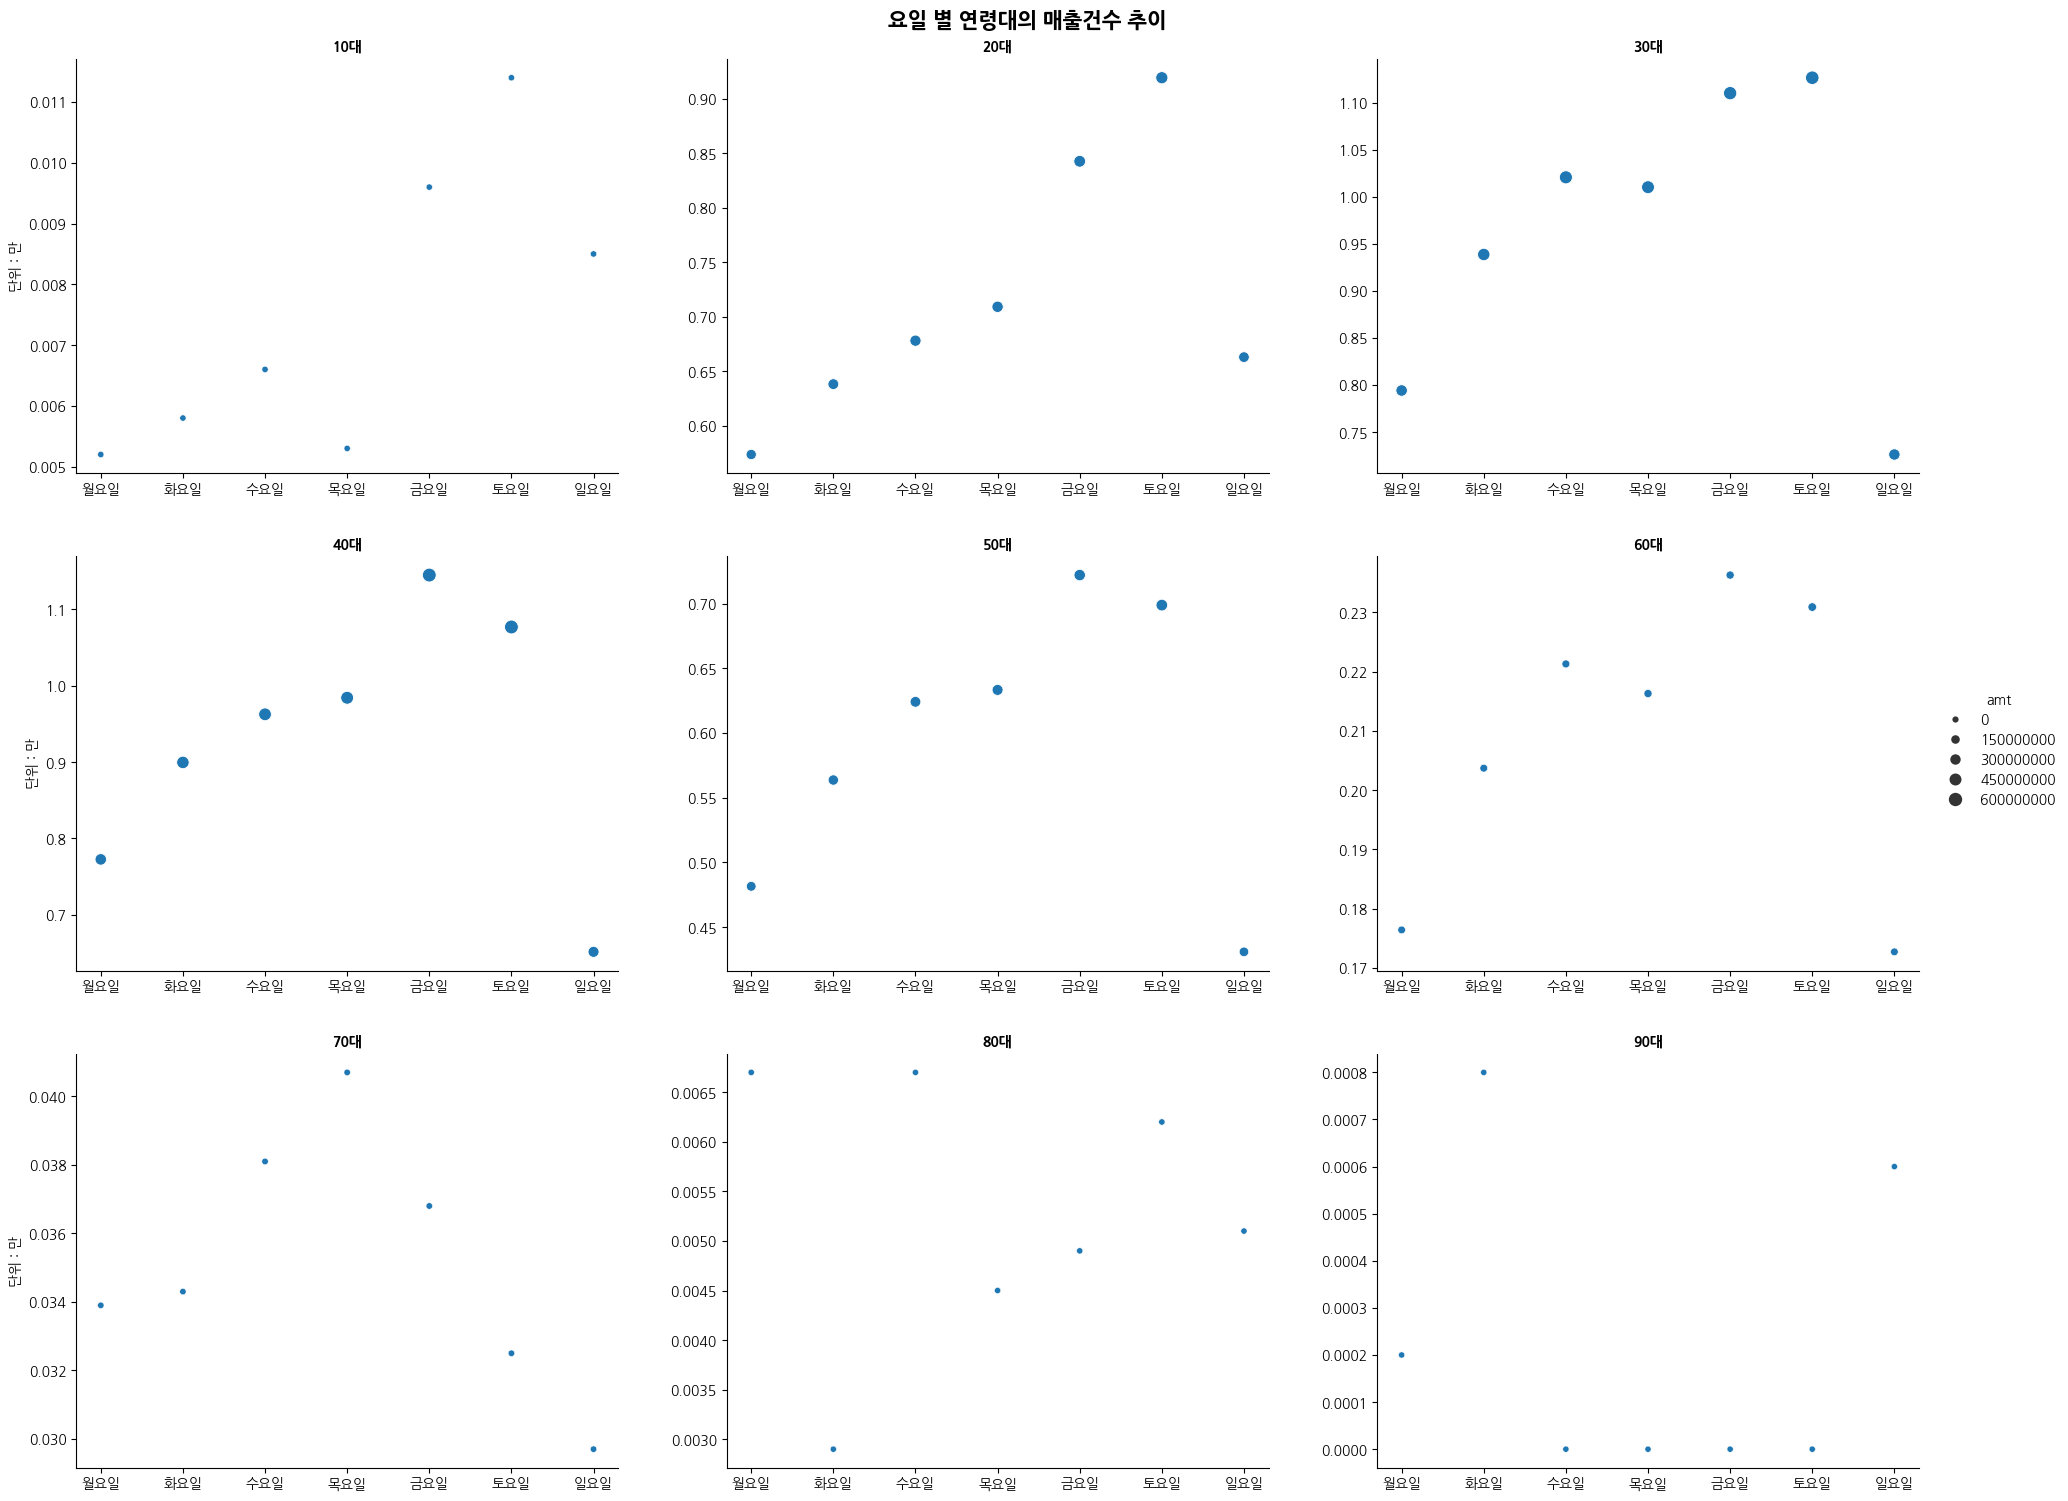

In [10]:
# 요일 7개 나이 9개 -> 63종류 ->  multiple

## 산점도 데이터 생성
multiple_day_age_pubs = pubs_df.groupby(['age','day'])[['amt','cnt']].sum().reset_index()

## cnt 단위 (만)
cnt_y = multiple_day_age_pubs['cnt']/10000

## 멀티플 산점도 ( 범례, 색깔, 모양 고려해볼 것)
m = sns.relplot(data = multiple_day_age_pubs, x = multiple_day_age_pubs['day'], y = cnt_y, col='age', kind = 'scatter', col_wrap = 3,
                size='amt', sizes=(20,100), row_order = 3, aspect=1.3, 
                  facet_kws={'sharex':False, 'sharey':False})
m.fig.subplots_adjust(hspace=0.2, wspace=0.2)
m.fig.suptitle('요일 별 연령대의 매출건수 추이', fontsize=15, weight='bold', y=1.01)


# ax번째에 이름부여
for age, ax in m.axes_dict.items():
  ax.set_title(f"{age}", fontsize = 10, weight='bold')
  ax.set_xlabel('')
  if age in ['10대', '40대', '70대']:
     ax.set_ylabel('단위 : 만')
  else:
     pass

화 -> 수는 왤케 확 올라가는걸까
수->목은 비슷하거나 수요일이 더비슷할때가 많네. (수요일에 뭐가 있나 ? or 우연인가? -> 상관관계테스트, t-test 검정필요)

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\27170171.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multiple_day_age_pubs = pubs_df.groupby(['age','day'])[['amt','cnt']].sum().reset_index()


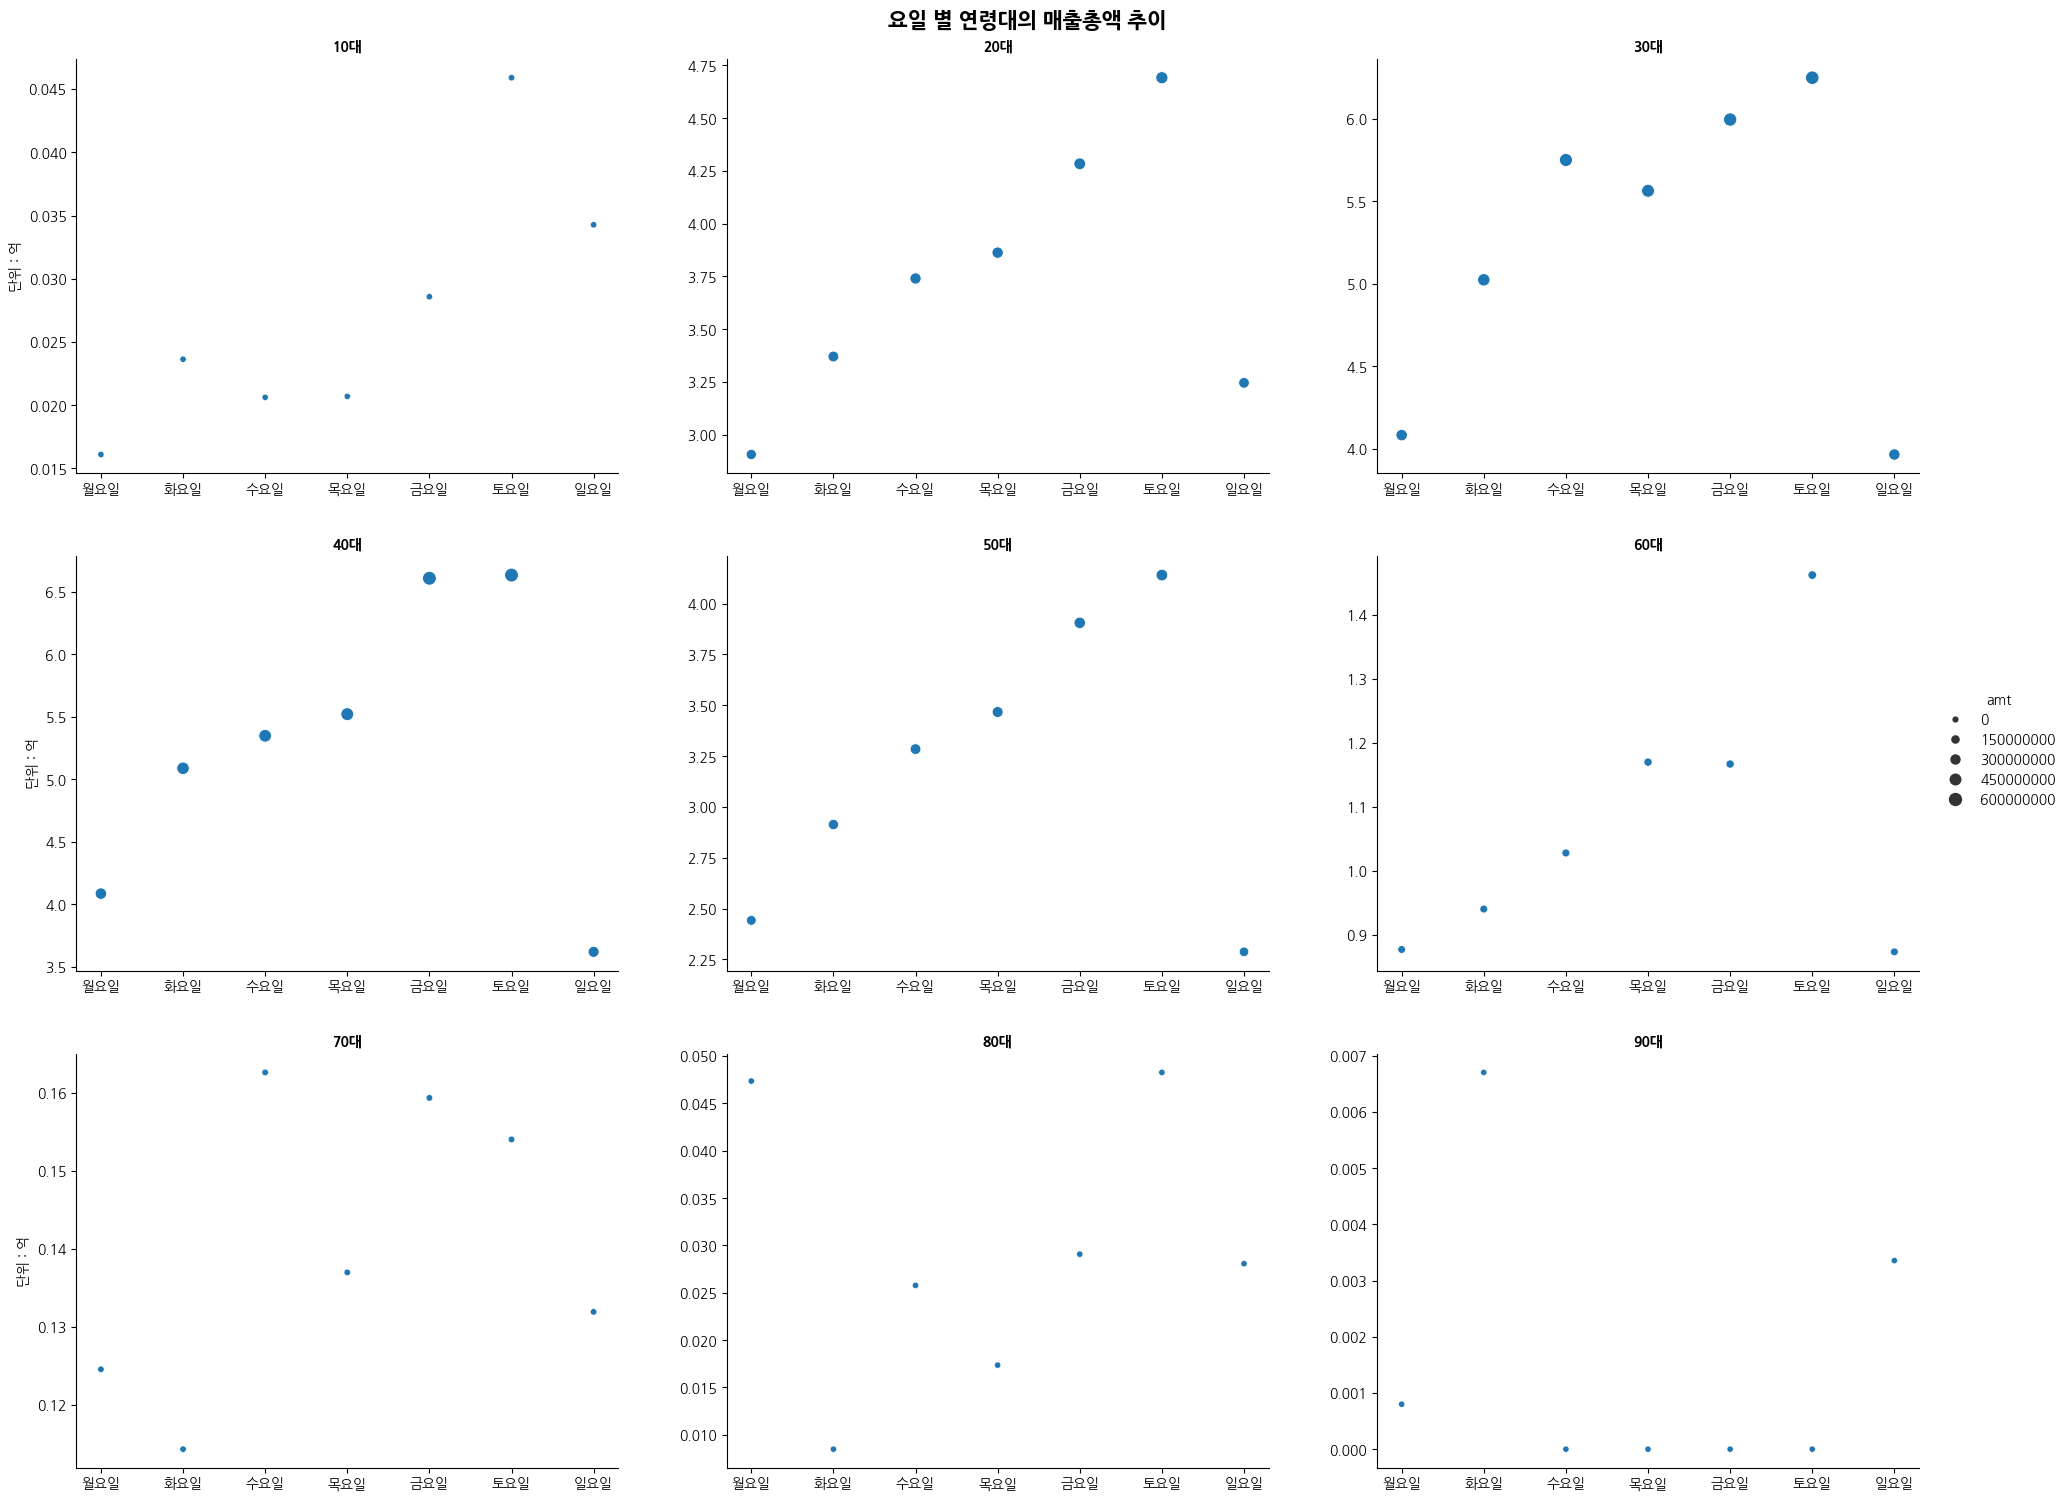

In [11]:
# 요일 7개 나이 9개 -> 63종류 ->  multiple

## 산점도 데이터 생성
multiple_day_age_pubs = pubs_df.groupby(['age','day'])[['amt','cnt']].sum().reset_index()

## amt 단위 (억)
amt_y = multiple_day_age_pubs['amt']/100000000

## 멀티플 산점도 ( 범례, 색깔, 모양 고려해볼 것 )
m = sns.relplot(data = multiple_day_age_pubs, x = multiple_day_age_pubs['day'], y = amt_y, col='age', kind = 'scatter', col_wrap = 3,
                size='amt', sizes=(20,100), row_order = 3, aspect=1.3, 
                  facet_kws={'sharex':False, 'sharey':False})
m.fig.subplots_adjust(hspace=0.2, wspace=0.2)
m.fig.suptitle('요일 별 연령대의 매출총액 추이', fontsize=15, weight='bold', y=1.01)
# ax번째에 이름부여
for age, ax in m.axes_dict.items():
  ax.set_title(f"{age}", fontsize = 10, weight='bold')
  ax.set_xlabel('')
  if age in ['10대', '40대', '70대']:
     ax.set_ylabel('단위 : 억')
  else:
     pass

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\2143090565.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_sex_pubs = pubs_df.groupby(['day','sex'])['cnt'].sum().reset_index()


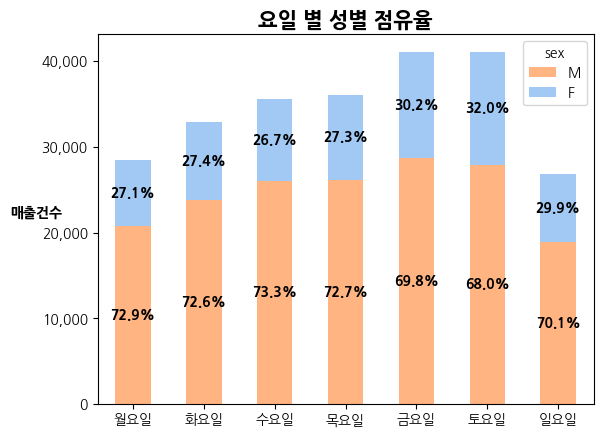

In [12]:
import matplotlib.ticker as ticker

#그룹화할 데이터 생성(cnt만)
day_sex_pubs = pubs_df.groupby(['day','sex'])['cnt'].sum().reset_index()

# 남, 여 색깔설정
M_color = '#ffb482'
F_color = '#a1c9f4'

sex_color = [M_color, F_color]

# 남, 여 색깔정렬
sex_plt_order = ['M', 'F']

# stack option의 가독성을 위해 pivot
day_sex_pubs_pivot = day_sex_pubs.pivot(index='day', columns='sex', values='cnt')[sex_plt_order]

# 그래프 그리기
b = day_sex_pubs_pivot.plot(kind='bar', align='center', stacked=True, color=sex_color, rot=0)
b.set_xlabel('')
b.set_ylabel('매출건수', rotation=0, weight='bold')
b.set_yticks([0, 10000, 20000, 30000, 40000])
b.set_title('요일 별 성별 점유율', fontsize= 15, weight='bold')
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:f'{int(x):,}'))

#M_percentage
for idx, (key, key_value) in enumerate(day_sex_pubs_pivot.iterrows()):
  total = key_value.sum()
  m_pct = (key_value['M']/total) * 100
  
  plt.text(x=idx, y=key_value['M']/2, s=f"{m_pct:.1f}%", ha='center', va='center', fontweight='bold')

#F_percentage
for idx, (key, key_value) in enumerate(day_sex_pubs_pivot.iterrows()):
  total = key_value.sum()
  f_pct = (key_value['F']/total) * 100
  
  plt.text(x=idx, y=key_value['M']+key_value['F']/2, s=f"{f_pct:.1f}%", ha='center', va='center', weight='bold')




C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\2867772843.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_sex_pubs = pubs_df.groupby(['day','sex'])['amt'].sum().reset_index()


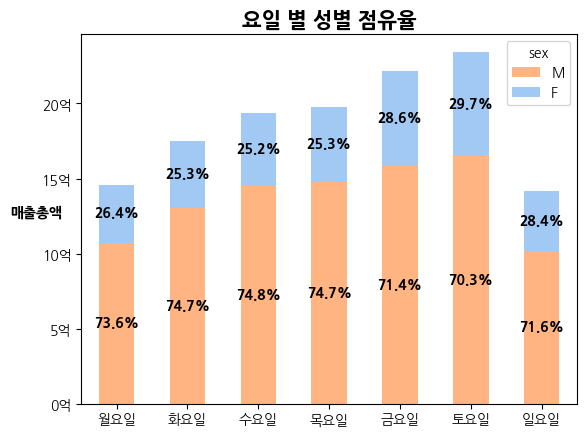

In [13]:
#그룹화할 데이터 생성(amt만)
day_sex_pubs = pubs_df.groupby(['day','sex'])['amt'].sum().reset_index()

# 남, 여 색깔설정
M_color = '#ffb482'
F_color = '#a1c9f4'

sex_color = [M_color, F_color]

# 남, 여 색깔정렬
sex_plt_order = ['M', 'F']

# stack option의 가독성을 위해 pivot
day_sex_pubs_pivot = day_sex_pubs.pivot(index='day', columns='sex', values='amt')[sex_plt_order]

# 그래프 그리기
b = day_sex_pubs_pivot.plot(kind='bar', align='center', stacked=True, color=sex_color, rot=0)
b.set_xlabel('')
b.set_ylabel('매출총액', rotation=0, weight='bold')
b.set_title('요일 별 성별 점유율', fontsize = 15, weight='bold')
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:f'{int(x/100000000)}억'))

#M_percentage
for idx, (key, key_value) in enumerate(day_sex_pubs_pivot.iterrows()):
  total = key_value.sum()
  m_pct = (key_value['M']/total) * 100
  
  plt.text(x=idx, y=key_value['M']/2, s=f"{m_pct:.1f}%", ha='center', va='center', fontweight='bold')

#F_percentage
for idx, (key, key_value) in enumerate(day_sex_pubs_pivot.iterrows()):
  total = key_value.sum()
  f_pct = (key_value['F']/total) * 100
  
  plt.text(x=idx, y=key_value['M']+key_value['F']/2, s=f"{f_pct:.1f}%", ha='center', va='center', weight='bold')


# **↑**
### 남자의 비중이 압도적으로 높은 이유에는 남자가 대표로 결제하기 떄문일 수 있음
### (즉, 카드 결제 명의가 남성 혹은 회식이나 단체의 결제 (법인)등의 변수 존재)

---
sex 분석

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\784865749.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_hour_pubs = pubs_df.groupby(['sex','hour'])['cnt'].sum().reset_index()


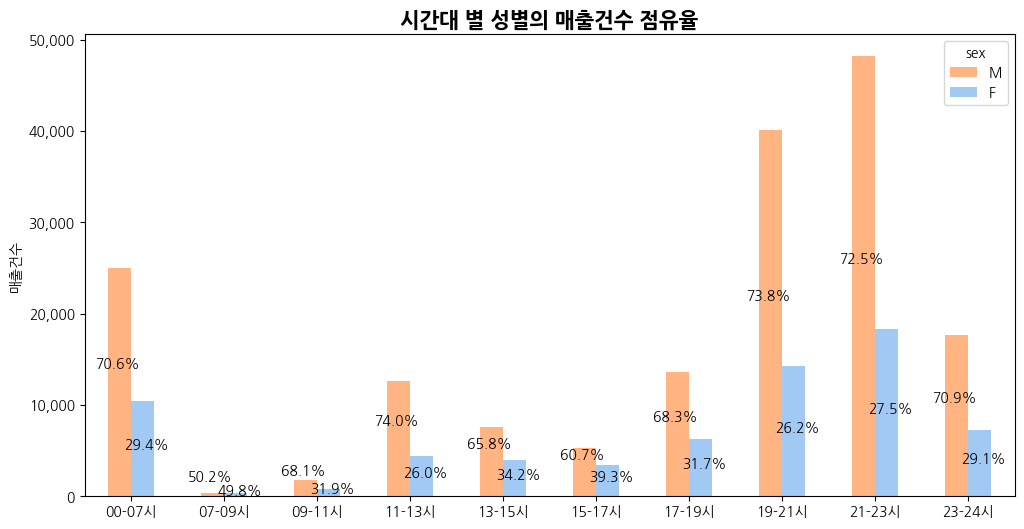

In [14]:
#데이터 생성
sex_hour_pubs = pubs_df.groupby(['sex','hour'])['cnt'].sum().reset_index()

#도화지
fig, ax = plt.subplots(figsize=(12,6))


#그래프 그리기
sex_hour_pubs_pivot = sex_hour_pubs.pivot(index='hour', columns='sex', values='cnt')[sex_plt_order]
bar = sex_hour_pubs_pivot.plot(stacked=False, kind='bar', rot=0, align='center', color=sex_color, ax=ax)

#부가옵션(x, y)
bar.set_title('시간대 별 성별의 매출건수 점유율', fontsize=15, weight='bold')
bar.set_xlabel('')
bar.set_ylabel('매출건수')

bar.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

#M_percentage plt.text
for i, (key, key_value) in enumerate(sex_hour_pubs_pivot.iterrows()):
  total = key_value.sum()
  m_pct = (key_value['M']/total) * 100
  
  plt.annotate(xy=(i, key_value['M']/2), xytext=(6, 10), textcoords='offset points', ha='right', text=f'{m_pct:.1f}%')

#F_percentage
for i, (key, key_value) in enumerate(sex_hour_pubs_pivot.iterrows()):
  total = key_value.sum()
  f_pct = (key_value['F']/total) * 100
  
  plt.annotate(xy=(i, key_value['F']/2), xytext=(-5, 0), textcoords='offset points', text=f'{f_pct:.1f}%')




C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\287597949.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_hour_pubs = pubs_df.groupby(['sex','hour'])['amt'].sum().reset_index()


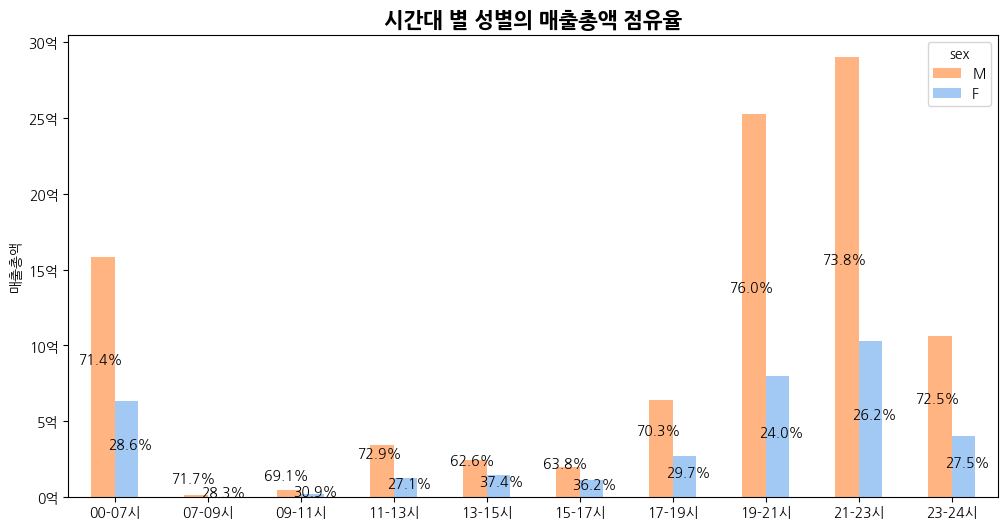

In [15]:
#데이터 생성
sex_hour_pubs = pubs_df.groupby(['sex','hour'])['amt'].sum().reset_index()

#도화지
fig, ax = plt.subplots(figsize=(12,6))

#그래프 그리기
sex_hour_pubs_pivot = sex_hour_pubs.pivot(index='hour', columns='sex', values='amt')[sex_plt_order]
bar = sex_hour_pubs_pivot.plot(stacked=False, kind='bar', rot=0, align='center', color=sex_color, ax=ax)

#부가옵션(x, y)
bar.set_title('시간대 별 성별의 매출총액 점유율', fontsize=15, weight='bold')
bar.set_xlabel('')
bar.set_ylabel('매출총액')

bar.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/100000000)}억'))

#M_percentage plt.text
for i, (key, key_value) in enumerate(sex_hour_pubs_pivot.iterrows()):
  total = key_value.sum()
  m_pct = (key_value['M']/total) * 100
  
  plt.annotate(xy=(i, key_value['M']/2), xytext=(6, 10), textcoords='offset points', ha='right', text=f'{m_pct:.1f}%')

#F_percentage
for i, (key, key_value) in enumerate(sex_hour_pubs_pivot.iterrows()):
  total = key_value.sum()
  f_pct = (key_value['F']/total) * 100
  
  plt.annotate(xy=(i, key_value['F']/2), xytext=(-5, 0), textcoords='offset points', text=f'{f_pct:.1f}%')




In [16]:
from scipy.stats import chi2_contingency

age_sex_ct = pd.crosstab(pubs_df['age'],pubs_df['sex'])

age_day_ct = pd.crosstab(pubs_df['age'],pubs_df['day'])

#--카이제곱검정--
age_sex_chi2, age_sex_p, dof, expected =  chi2_contingency(age_sex_ct)
age_day_chi2, age_day_p, dof, expected = chi2_contingency(age_day_ct)

print("---age x sex chi2 test ---")
print(age_sex_chi2)
print(age_sex_p)
print(" ")
print("---age x day chi2 test ---")
print(age_day_chi2)
print(age_day_p)
print(" ")
print("--- chi2 test ---")
print(age_day_chi2)
print(age_day_p)



---age x sex chi2 test ---
250.5938454361082
1.2892793436518975e-49
 
---age x day chi2 test ---
80.79677703760801
0.0021316814368180534
 
--- chi2 test ---
80.79677703760801
0.0021316814368180534


---
age


C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\1426073988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  twinx_pubs = pubs_df.groupby('month')[['amt','cnt']].sum().reset_index()


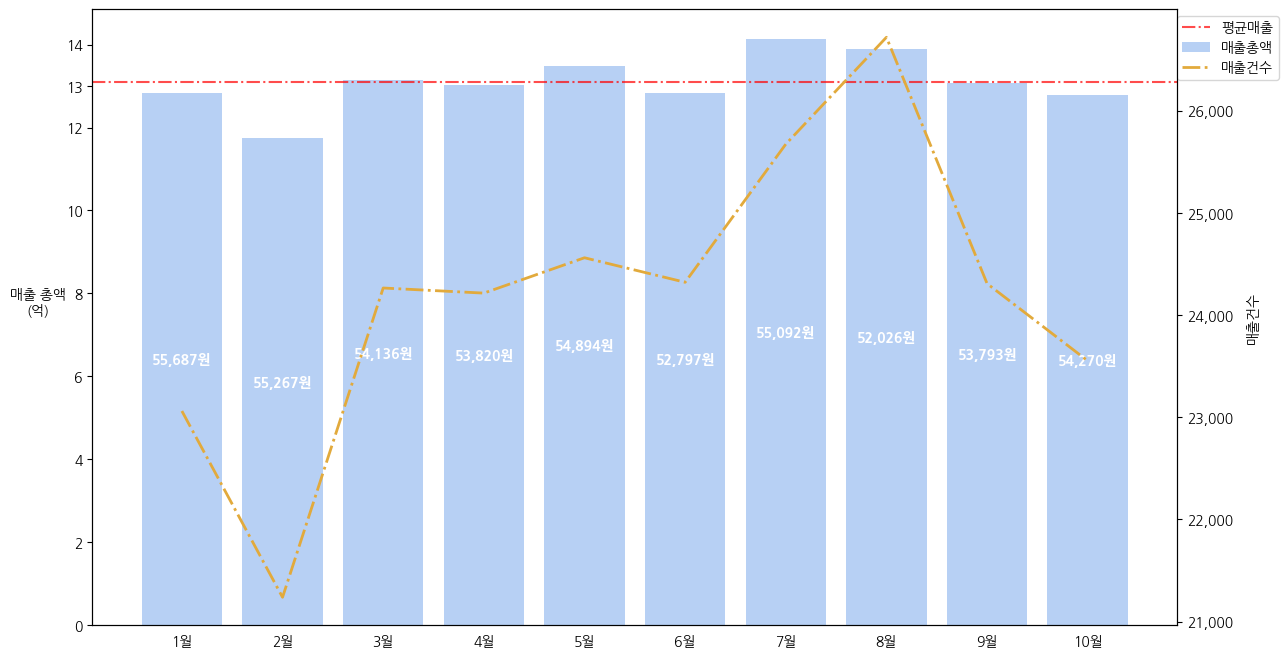

In [63]:
#이중 축 그래프 (twinx, axv, axh)
twinx_pubs = pubs_df.groupby('month')[['amt','cnt']].sum().reset_index()
twinx_pubs['month'] = pd.Categorical(twinx_pubs['month'], categories = my_month, ordered=True)
twinx_pubs = twinx_pubs.sort_values('month')
twinx_pubs

fig, ax1 = plt.subplots(figsize=(14,8))


bar_color = "#5d9eff"
line_color = "#e2aa3c"
mean_linear_color = "red"

# #bar y축 단위 정리
twinx_bar_amt_y = twinx_pubs['amt']/100000000

# 월 별 막대그래프
bar = sns.barplot(x=twinx_pubs['month'], y=twinx_bar_amt_y, color = bar_color, alpha = 0.5, ax=ax1, label='매출총액')
bar.set_ylabel('매출 총액\n(억)', rotation = 0, labelpad=20)
ax1.tick_params(axis='x', bottom=False)
ax1.set_xlabel('')
#축 공유
ax2=ax1.twinx()

# 매출건수 이중축
line = sns.lineplot(x=twinx_pubs['month'], y=twinx_pubs['cnt'], ax=ax2, linestyle = '-.',
                    linewidth=2, color=line_color, alpha = 1, label='매출건수', legend=False)
line.set_xlabel('')
line.set_ylabel('매출건수', labelpad=10)
line.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{int(y):,}"))


#평균 linear를 axh로 표현
twinx_mean_amt = twinx_pubs['amt'].mean()
twinx_mean_amt = twinx_mean_amt/100000000
axh_line = ax1.axhline(y = twinx_mean_amt, color=mean_linear_color, linestyle='-.', alpha=0.7, label='평균매출')
ax1.set_yticks([0,2,4,6,8,10,12,13,14])

#막대는 매출총액 ]
#라인은 매출건수ㅣ 라는 범례를 만들자.
#axh라인은 평균 ]
lines1, lables1 = ax1.get_legend_handles_labels()
lines2, lables2 = ax2.get_legend_handles_labels()

ax1.legend(lines1+lines2, lables1 + lables2, loc='upper right', frameon=True, bbox_to_anchor=(1.1,1))

#객단가 ( 원 ) 
for i, (key, value) in enumerate(twinx_pubs.iterrows()):
  atv = value['amt']/value['cnt']
  atv_text = f"{atv:,.0f}원"
  y_pos = twinx_bar_amt_y.iloc[i]/2
  ax1.text(x=i, y=y_pos, s=atv_text , color='white', fontweight='bold', fontsize=10, ha='center', va='center')




In [78]:
# 봄 여름 가을 겨울 설정
season_order = ['봄', '여름', '가을', '겨울']

#
pubs_df['month_num'] = pd.to_datetime(pubs_df['ta_ymd'], format='%Y%m%d').dt.month
pubs_df['period'] = pubs_df['month_num'].apply(add_season)


#기준은 입춘 등 절기로 
def add_season(month):
  if month==12 or month <=2:
    return "겨울"
  elif(3<=month<=5):
    return "봄"
  elif(6<=month<=8):
    return "여름"
  else:
    return "가을"

pubs_df = pubs_df.drop('month_num', axis=1)
pd.Categorical(pubs_df['period'], categories=season_order, ordered=True)

['겨울', '겨울', '겨울', '겨울', '겨울', ..., '가을', '가을', '가을', '가을', '가을']
Length: 65390
Categories (4, object): ['봄' < '여름' < '가을' < '겨울']

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_15832\489422572.py:8: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  line = sns.lineplot(data=day_period_line_pubs, x='day', y = line_amt_y, hue='period', hue_order=season_order, style='period', markers='o', ax=ax)


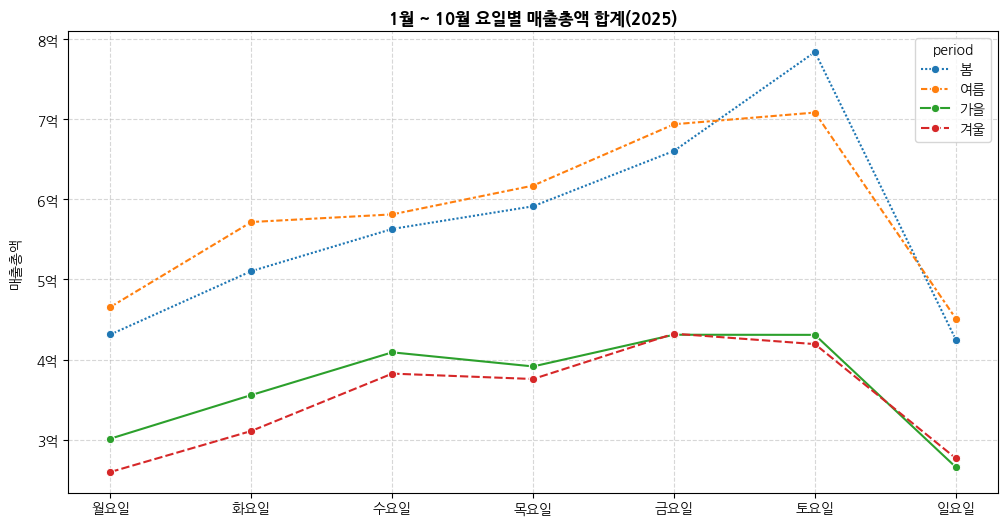

In [101]:
day_period_line_pubs = pubs_df.groupby(['day','period'], observed=True)['amt'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))

#
line_amt_y = day_period_line_pubs['amt']/100000000

line = sns.lineplot(data=day_period_line_pubs, x='day', y = line_amt_y, hue='period', hue_order=season_order, style='period', markers='o', ax=ax)
line.grid(linestyle='--', alpha=0.5)
plt.title("1월 ~ 10월 요일별 매출총액 합계(2025)", weight='bold')
line.set_ylabel('매출총액', rotation=90, labelpad=10)
line.set_xlabel('')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}억"))

# 시각화 및 탐색적 데이터 분석
## 현재의 작업과정은 나머지 16개 업종에서도 사용할 것 같음 -> 작업하는 모듈로 만들 고민중